In [1]:
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Model
from sklearn.utils import shuffle

In [2]:
data_dir = r"C:\Users\vishal haldar\Desktop\python\deep learnig\skin\ML\dataset"  # Replace with the actual path to the dataset folder
benign_dir = os.path.join(data_dir, "benign")
malignant_dir = os.path.join(data_dir, "malignant")

In [3]:
IMG_SIZE = (64, 64)
BATCH_SIZE = 32


In [4]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith((".jpg", ".png", ".jpeg")):
            img = load_img(img_path, target_size=IMG_SIZE)
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
            labels.append(label)
    return images, labels

In [5]:
# Load benign and malignant images
benign_images, benign_labels = load_images_from_folder(benign_dir, 0)  # Label 0 for benign
malignant_images, malignant_labels = load_images_from_folder(malignant_dir, 1)  # Label 1 for malignant

In [6]:
X = np.array(benign_images + malignant_images)
y = np.array(benign_labels + malignant_labels)
X, y = shuffle(X, y, random_state=42)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
base_model = MobileNet(input_shape=(64, 64, 3), include_top=False, weights='imagenet', pooling='avg')
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

C:\Users\vishal haldar\AppData\Local\Temp\ipykernel_15796\3797615224.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(input_shape=(64, 64, 3), include_top=False, weights='imagenet', pooling='avg')


In [9]:
X_train_features = feature_extractor.predict(X_train, batch_size=BATCH_SIZE)
X_test_features = feature_extractor.predict(X_test, batch_size=BATCH_SIZE)

266/266 ━━━━━━━━━━━━━━━━━━━━ 38s 138ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step


In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_features, y_train)


RandomForestClassifier(random_state=42)

In [11]:
rf_model.score(X_train_features, y_train)*100,rf_model.score(X_test_features, y_test)*100

(100.0, 86.79867986798679)

In [12]:
y_pred = rf_model.predict(X_test_features)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy*100)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


Model Accuracy: 86.79867986798679
Classification Report:
               precision    recall  f1-score   support

      Benign       0.84      0.91      0.88      1074
   Malignant       0.90      0.82      0.86      1047

    accuracy                           0.87      2121
   macro avg       0.87      0.87      0.87      2121
weighted avg       0.87      0.87      0.87      2121



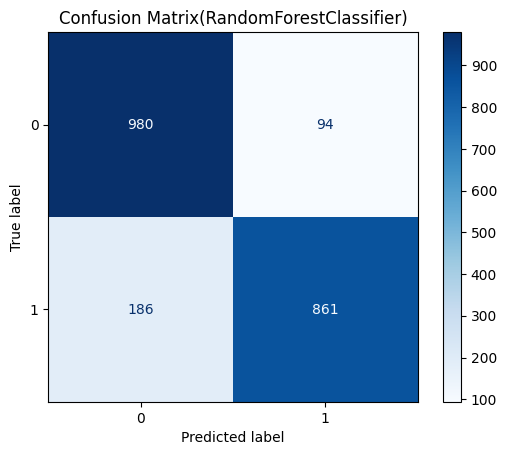

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are the true and predicted labels respectively
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix(RandomForestClassifier)")
plt.show()
